In [10]:
# Imports
import seaborn as sns
import numpy as np
import os
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from typing import *
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, HTML
    
# Functions:
def read_file(file):
    names = ["sample", "nb_circ_tot", "nb_true_exonic", 
             "nb_probable_exonic", "nb_intronic", "nb_non_annotated"]
    df = pd.read_table(file, sep = '\t', names=names)
    df = df.replace(np.nan, '', regex=True) 
    return df

df = read_file("../results/stats_annotation_all.tsv")
display(df)

,sample,nb_circ_tot,nb_true_exonic,nb_probable_exonic,nb_intronic,nb_non_annotated
0,pig-testis-31,17314,11984,1891,1215,2828
1,pig-liver-old2,3118,2282,198,281,474
2,cow-liver-B004,1978,1199,181,87,536
3,cow-testis-neonat1,5470,4063,614,129,713


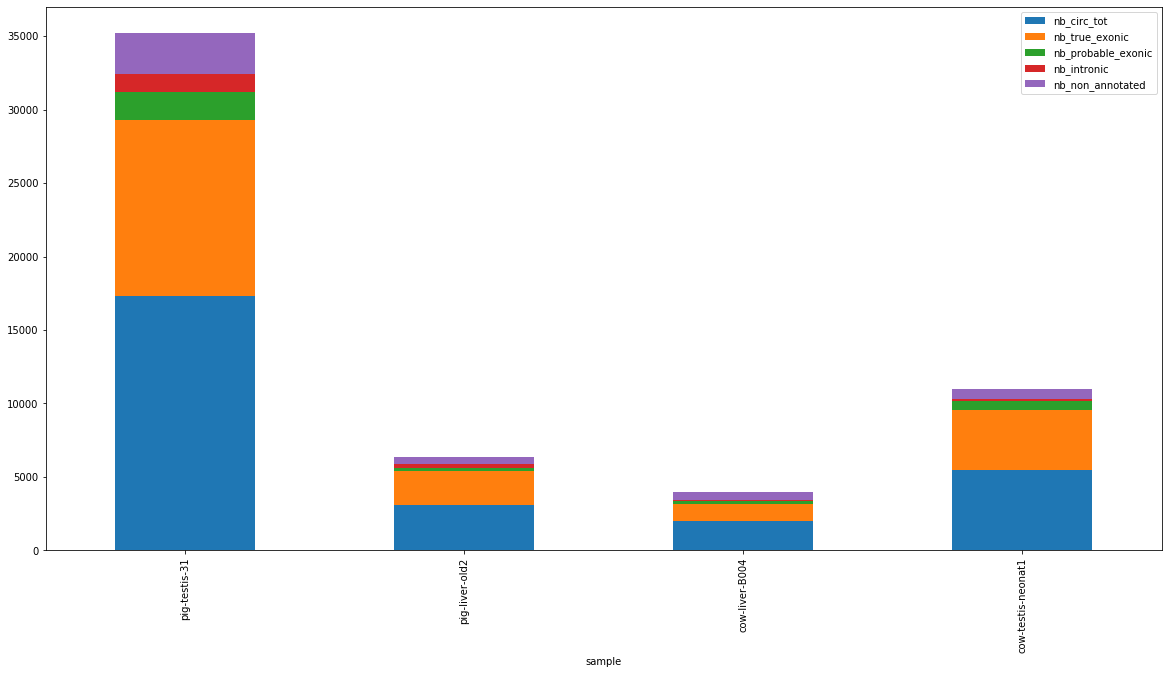

In [11]:
# I. Number of circRNAs per type (STACKED BAR PLOT):

df.plot.bar(x='sample', stacked=True, figsize=(20,10));

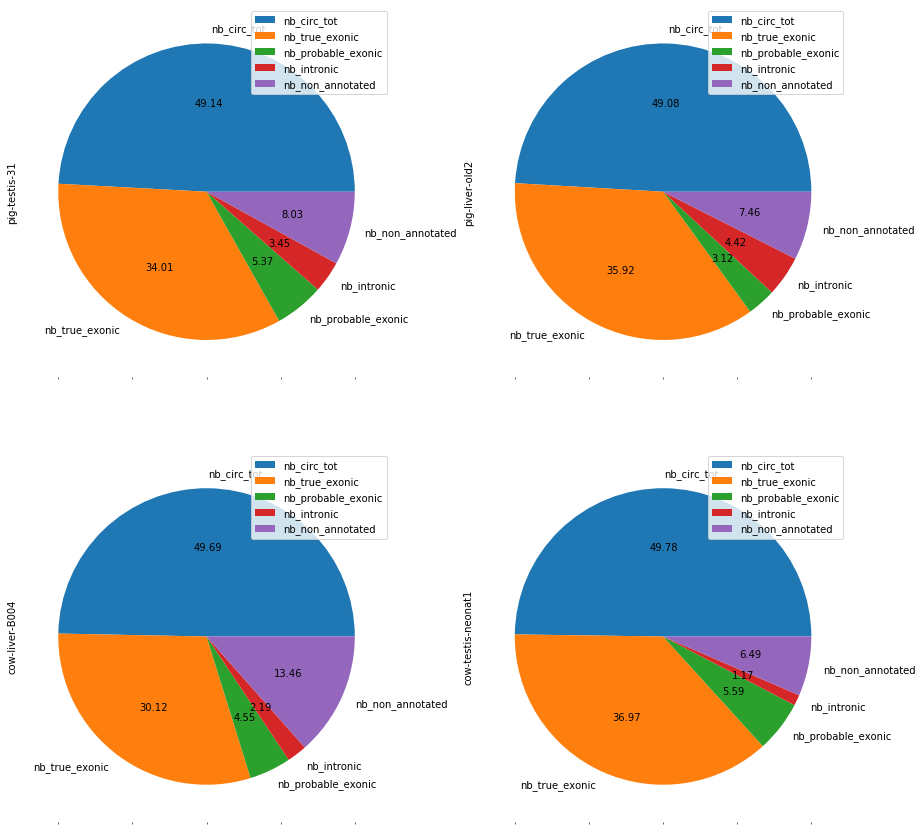

In [27]:
# I. Number of circRNAs per type (PIE):
data = df.set_index('sample').T.to_dict('list')
df1 = pd.DataFrame(data, index=["nb_circ_tot", "nb_true_exonic", "nb_probable_exonic",
                                "nb_intronic", "nb_non_annotated"])
plot = df1.plot.pie(subplots=True, autopct='%.2f', figsize=(15, 15), layout=(2,2))